In [8]:
import json
from driver.collector.collector_factory import get_collector
from driver.collector.postgres_collector import PostgresCollector
import time
import pandas as pd
from query import q

query = """SELECT
  sum(seq_scan) as seq_scan,
  sum(seq_tup_read) as seq_tup_read,
  sum(idx_scan) as idx_scan,
  sum(idx_tup_fetch) as idx_tup_fetch,
  sum(n_tup_ins) as n_tup_ins,
  sum(n_tup_upd) as n_tup_upd,
  sum(n_tup_del) as n_tup_del,
  sum(n_tup_hot_upd) as n_tup_hot_upd,
  sum(n_live_tup) as n_live_tup,
  sum(n_dead_tup) as n_dead_tup,
  sum(n_mod_since_analyze) as n_mod_since_analyze,
  sum(vacuum_count) as vacuum_count,
  sum(autovacuum_count) as autovacuum_count,
  sum(analyze_count) as analyze_count,
  sum(autoanalyze_count) as autoanalyze_count
FROM
  pg_stat_user_tables;
"""

q(query)

,seq_scan,seq_tup_read,idx_scan,idx_tup_fetch,n_tup_ins,n_tup_upd,n_tup_del,n_tup_hot_upd,n_live_tup,n_dead_tup,n_mod_since_analyze,vacuum_count,autovacuum_count,analyze_count,autoanalyze_count
0,2300249.0,142683486.0,90641455.0,202187022.0,50904680.0,13122.0,490.0,2119.0,50608262.0,12385.0,1108508.0,0.0,165.0,0.0,213.0


In [1]:
driver_config

NameError: name 'driver_config' is not defined

dic[digest] = digest_query(query_num, digest, digest_text, time, cpu_usage, io, count, timestamp)

SELECT queryid, query,  calls, total_exec_time as time_ms, blk_read_time+blk_write_time as io_time FROM pg_stat_statements;
SELECT queryid, substr(query,0,50),  calls, total_exec_time as time_ms, blk_read_time+blk_write_time as io_time FROM pg_stat_statements order by calls desc limit 10;
SELECT queryid, query,  calls, total_exec_time as time_ms, blk_read_time+blk_write_time as io FROM pg_stat_statements order by calls desc limit 10;

In [1]:
from performance_analysis import import_and_update_data


import_and_update_data()

Loaded Data from Pickle
2023-01-09 19:45:42.503770
Data Update Complete!


In [1]:
from performance_analysis import *
from visualize_widgets import *
visualize()

In [1]:
from scenario import *

scenario()

Loaded Data from Pickle
2023-01-11 22:48:20.679852
Data Update Complete!


HTML(value='<hr>')

HTML(value='<b><font size = 3> Database Monitoring')

HTML(value='<hr>')

HTML(value='<b><font size = 3>Resource Utilization')

HTML(value='<style>\n        .box{\n            width : 80%;\n            border : 1px solid black;\n         …

Accordion(children=(Tab(children=(Output(), Output()), _titles={'0': '# of active connections', '1': '% of max…

[ 5000 10000 15000 20000 25000 30000 35000 40000 45000 50000]
[10 12 14 16 18 21 23 25 27 30]
====================== Start Running TPC-C =======================
set [shared_buffers] to [5000]
set [max_connections] to [10]
Complete running TPC-C (shared_buffers: 5000/ max_connections: 10)| TPS: 7.186858316221766 QPS: 215.0924024640657 95th latency: 3706.08
set [shared_buffers] to [5000]
set [max_connections] to [12]
Complete running TPC-C (shared_buffers: 5000/ max_connections: 12)| TPS: 8.135058748542818 QPS: 263.84427652490416 95th latency: 3386.99
set [shared_buffers] to [5000]
set [max_connections] to [14]
Complete running TPC-C (shared_buffers: 5000/ max_connections: 14)| TPS: 8.250474189624816 QPS: 247.3441128188553 95th latency: 3574.99
set [shared_buffers] to [5000]
set [max_connections] to [16]
Complete running TPC-C (shared_buffers: 5000/ max_connections: 16)| TPS: 7.565682066147954 QPS: 200.92858792517143 95th latency: 4055.23
set [shared_buffers] to [5000]
set [max_connectio

Complete running TPC-C (shared_buffers: 25000/ max_connections: 12)| TPS: 7.7697028677266955 QPS: 221.6327363480827 95th latency: 3911.79
set [shared_buffers] to [25000]
set [max_connections] to [14]
Complete running TPC-C (shared_buffers: 25000/ max_connections: 14)| TPS: 6.416659982645852 QPS: 175.145650889947 95th latency: 4683.57
set [shared_buffers] to [25000]
set [max_connections] to [16]
Complete running TPC-C (shared_buffers: 25000/ max_connections: 16)| TPS: 9.473519453666253 QPS: 260.72773105090164 95th latency: 3386.99
set [shared_buffers] to [25000]
set [max_connections] to [18]
Complete running TPC-C (shared_buffers: 25000/ max_connections: 18)| TPS: 10.31917661943774 QPS: 286.33471819674634 95th latency: 2985.89
set [shared_buffers] to [25000]
set [max_connections] to [21]
Complete running TPC-C (shared_buffers: 25000/ max_connections: 21)| TPS: 11.305724175116971 QPS: 315.42970448576347 95th latency: 2728.81
set [shared_buffers] to [25000]
set [max_connections] to [23]
C

Complete running TPC-C (shared_buffers: 45000/ max_connections: 16)| TPS: 11.224481184224961 QPS: 313.35713260922773 95th latency: 2778.39
set [shared_buffers] to [45000]
set [max_connections] to [18]
Complete running TPC-C (shared_buffers: 45000/ max_connections: 18)| TPS: 12.02706548783063 QPS: 339.42031380541863 95th latency: 2828.87
set [shared_buffers] to [45000]
set [max_connections] to [21]
Complete running TPC-C (shared_buffers: 45000/ max_connections: 21)| TPS: 11.123080830640147 QPS: 339.0350070504567 95th latency: 2449.36
set [shared_buffers] to [45000]
set [max_connections] to [23]
Complete running TPC-C (shared_buffers: 45000/ max_connections: 23)| TPS: 13.863047681587684 QPS: 399.0186421509613 95th latency: 2045.74
set [shared_buffers] to [45000]
set [max_connections] to [25]
Complete running TPC-C (shared_buffers: 45000/ max_connections: 25)| TPS: 9.767175936219548 QPS: 302.94126989168757 95th latency: 3095.38
set [shared_buffers] to [45000]
set [max_connections] to [27]

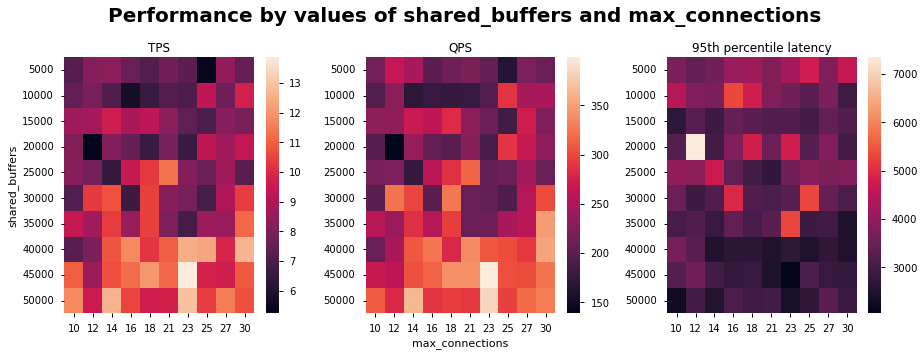

In [1]:
from run_experiment import run

run()

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

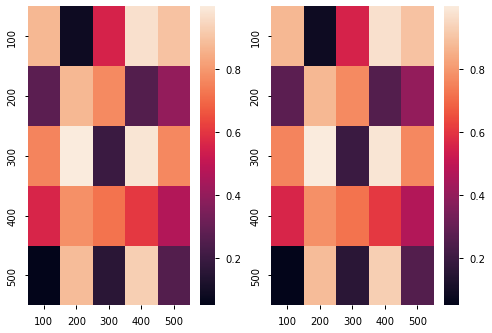

In [8]:
result = {}
result['TPS'] = np.random.random((5,5))
knob1_val = [100,200,300,400,500]

df = pd.DataFrame(result['TPS'], columns =knob1_val, index = knob1_val)

fig, axes = plt.subplots(ncols=2)
sns.heatmap(df, ax = axes[0])
sns.heatmap(df, ax = axes[1])



plt.show()